## Econ 210C Homework 1 (Part II)
Written by: Jiahui Shui

**Note that due to time limit, I only wrote code for a single** $\nu$. For plot, please refer to hw1_code.py.

First we have to list the $\boldsymbol{H}$:
$$
            \boldsymbol{H}(\boldsymbol{Y},\varepsilon_m)=\begin{pmatrix}
                \hat{n}_t-\hat{y}_t\\
                \hat{w}_t-\hat{p}_t\\
                \gamma\hat{c}_t+\varphi\hat{n}_t+(\gamma-\nu)\Omega\eta\hat{q}_t-(\hat{w}_t-\hat{p}_t)\\
                \hat{c}_t-\eta\hat{q}_t-\hat{m}_t+\hat{p}_t\\
                \hat{c}_t-\hat{y}_t\\
                \hat{q}_t+\hat{p}_t-\hat{p}_{t+1}-\nu(\hat{c}_{t+1}-\hat{c}_t)+(-\gamma+\nu)(\hat{x}_{t+1}-\hat{x}_t)\\
                \rho_m\hat{m}_{t-1}+\varepsilon_t^{m}-\hat{m}_t\\
                (1-\Omega)\hat{c}_t+\Omega(\hat{m}_t-\hat{p}_t)-\hat{x}_t
            \end{pmatrix}
$$
where 
$$\eta=\frac{\beta}{\nu(1-\beta)},\quad \Omega=\frac{\theta^{\frac{1}{\nu}}\left(1-\frac{\beta}{\pi}\right)^{1-\frac{1}{\nu}}}{(1-\theta)^{\frac{1}{\nu}}+\theta^{\frac{1}{\nu}}\left(1-\frac{\beta}{\pi}\right)^{1-\frac{1}{\nu}}}$$
I have plugged that $\hat{a}_t=0$.

+ Monetary Block:$$\hat{m}_t=\rho_m\hat{m}_{t-1}+\varepsilon_t^{m}$$
+ Firm Block:$$\begin{aligned}
                    &\hat{y}_t=\hat{n}_t\\
                    &\hat{w}_t-\hat{p}_t=0\\
                \end{aligned}$$
+ Households Block:$$ \begin{aligned}
                    &\hat{w}_t-\hat{p}_t=\gamma\hat{c}_t+\varphi\hat{n}_t+(\gamma-\nu)\Omega\eta\hat{q}_t\\
                    &\hat{m}_t-\hat{p}_t=\hat{c}_t-\eta\hat{q}_t
                    \end{aligned}$$
+ Market Clearing \& Euler: $$\begin{aligned}
                    &\hat{y}_t=\hat{c}_t\\
                    &0=\mathbb{E}[\hat{q}_t+\hat{p}_t-\hat{p}_{t+1}-\nu(\hat{c}_{t+1}-\hat{c}_t)+(-\gamma+\nu)(\hat{x}_{t+1}-\hat{x}_t)]
                \end{aligned}$$
+ $X$: $$\hat{x}_t=(1-\Omega)\hat{c}_t+\Omega(\hat{m}_t-\hat{p}_t)$$

Here we set $\boldsymbol{U}=\{\hat{n},\hat{p}\}$.

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Parameters

In [6]:
gam = 1
phi = 1
chi = 1
beta = 0.99
rho = 0.99

T = 500

## Nu and Theta
Note that here when we substitute all the parameters above into the equation for calibrating $\theta$, we can get a very simple expression of $\theta$. While one can solve the nonlinear equation as I have done in the matlab code.

In [5]:
nu = 0.25
theta = (1 - beta) / ( (1 - beta) + ( (-(1 - beta) + np.sqrt(beta**2 - 2*beta + 5))/2 )**nu )

## Matrices

In [7]:
I = sp.sparse.eye(T)
Ip1 = sp.sparse.diags([np.ones(T-1)], [1], (T, T))
Im1 = sp.sparse.diags([np.ones(T-1)], [-1], (T, T))
O = sp.sparse.csr_matrix((T, T))

## dHdY

In [9]:
# Market Clearing Condition
Phigmc = I
Phigmy = -I
Phigmq = O
Phigmx = O 
Phigmw = O

# Euler Equation
Phieulc = nu*I-nu*Ip1
Phieulx = (gam-nu)*I-(gam-nu)*Ip1
Phieulq = I
Phieuly = O
Phieulw = O

dHdY = sp.sparse.bmat([[Phigmc, Phigmq, Phigmx, Phigmy, Phigmw],
                       [Phieulc, Phieulq, Phieulx, Phieuly, Phieulw]])

## dHdU
Note that here, since the Euler equation directly contains $p$, which is unknowns. Hence we have additional term in dHdU.

In [10]:
Phigmn = O
Phieuln = O
Phigmp = O
Phieulp = I-Ip1
dHdU = sp.sparse.bmat([[Phigmn, Phigmp], 
                       [Phieuln, Phieulp]])

## dYFdU and dYFdZ(Firm Block)

In [13]:
Phiyn = I
Phiyp = O
Phiyep = O
Phiwp = I
Phiwn = O
Phiwep = O
dYFdU = sp.sparse.bmat([[Phiyn, Phiyp], 
                        [Phiwn, Phiwp]])
dYFdZ = sp.sparse.bmat([[Phiyep],
                        [Phiwep]])

## dYHdU and dYHdZ (Household Block)

In [14]:
omega = (theta**(1/nu)*(1-beta)**(1-1/nu))/((1-theta)**(1/nu)+theta**(1/nu)*(1-beta)**(1-1/nu))
eta = beta/(nu*(1-beta))
Phicn = -eta*phi/(gam*eta-(gam-nu)*omega*eta)*I
Phicp = (gam-nu)*omega*eta/(gam*eta-(gam-nu)*omega*eta)*I
Phiqn = -phi/(gam*eta-(gam-nu)*omega*eta)*I
Phiqp = gam/(gam*eta-(gam-nu)*omega*eta)*I
Phicm = -(gam-nu)*omega*eta/(gam*eta-(gam-nu)*omega*eta)*I
Phiqm = -gam/(gam*eta-(gam-nu)*omega*eta)*I
Phixn = (1-omega)*Phicn
Phixp = (1-omega)*Phicp - omega*I
Phixm = (1-omega)*Phicm + omega*I
dYHdU = sp.sparse.bmat([[Phicn, Phicp],
                        [Phiqn, Phiqp],
                        [Phixn, Phixp]])
dYHdZ = sp.sparse.bmat([[Phicm],
                        [Phiqm],
                       [Phixm]])

## Stack dYdU and dYdZ

In [15]:
dYdU = sp.sparse.bmat([[dYHdU],
                       [dYFdU]])
dYdZ = sp.sparse.bmat([[dYHdZ],
                       [dYFdZ]])

## dHdU and dHdZ

In [16]:
# Note that here dHdU has additional direct effect term
dHdU = dHdY @ dYdU + dHdU
dHdZ = dHdY @ dYdZ

## Jacobian

In [17]:
dUdZ = - sp.sparse.linalg.spsolve(dHdU, dHdZ)
dYdZ = dYdU @ dUdZ + dYdZ

dXdZ = sp.sparse.bmat([[dUdZ],
                      [dYdZ]])

D:\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
D:\anaconda3\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


In [18]:
m = np.zeros((T, 1))
m[0] = 1
for t in range(1, T):
    m[t] = rho * m[t-1]

In [19]:
X = dXdZ @ m

In [20]:
# unpack X into its components n,q,c,q,x,y,w
n = X[0:T]
p = X[T:2*T]
c = X[2*T:3*T]
q = X[3*T:4*T]
x = X[4*T:5*T]
y = X[5*T:6*T]
w = X[6*T:7*T]

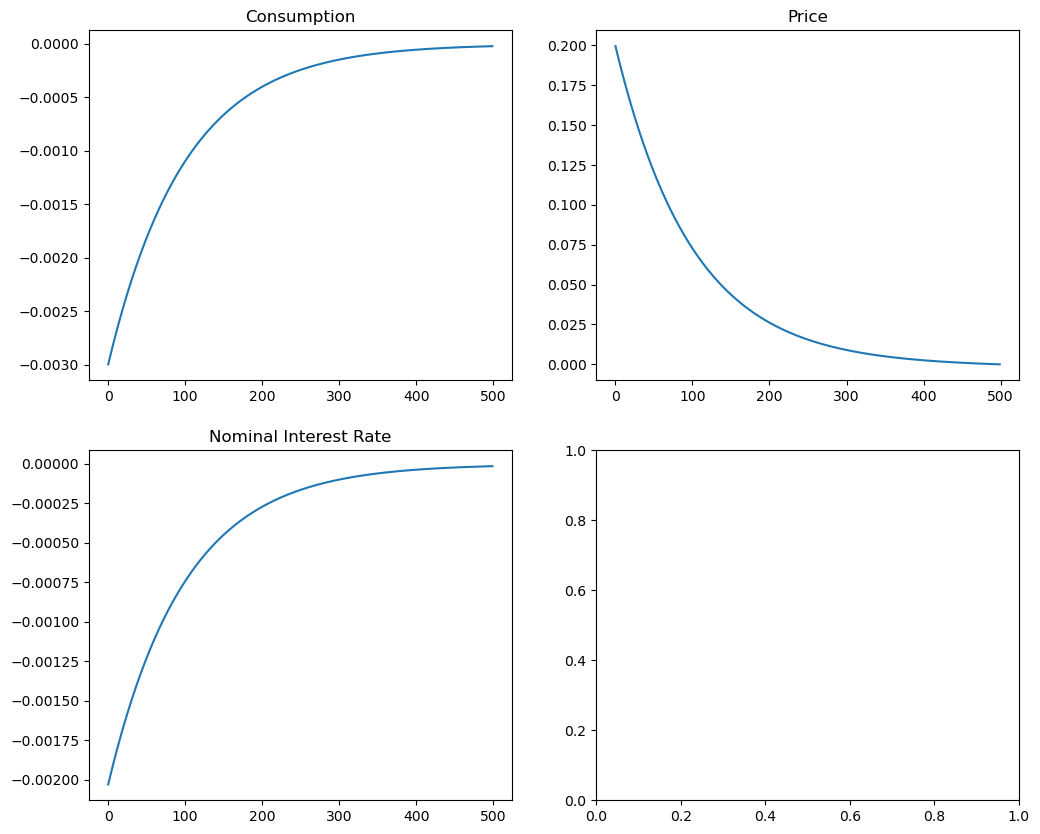

<Figure size 640x480 with 0 Axes>

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(c, label='c')
ax[0, 0].set_title('Consumption')
ax[0, 1].plot(p, label='p')
ax[0, 1].set_title('Price')
ax[1, 0].plot(q, label='q')
ax[1, 0].set_title('Nominal Interest Rate')
plt.show()
plt.savefig('IRFs.png')